In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

In [2]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [3]:
omeganu_index = 1 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omeganu_index]
onh2_str = spectra.omnu_strings[omeganu_index]
import copy as cp
skips_omega = np.delete(spectra.omegas_nu, omeganu_index)

In [4]:
# Axe the 0.01 value since Ariel has not tested that one in the shared results
powernu3 = spectra.define_powernu(
    "data/power_nu3/Aletheia_powernu3_zorig_nu",
    ["0.0006", "0.0021", "0.0064", "0.0100"] 
)

In [5]:
spectra.omegas_nu = spectra.omegas_nu[:(len(spectra.omegas_nu) - 1)]
spectra.omnu_strings = spectra.omnu_strings[:(len(spectra.omnu_strings) - 1)]

In [6]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.boltzmann_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = skips_omega, skips_model=[8], skips_snapshot=[1, 2, 3],
    fancy_neutrinos=False)

012

In [7]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
sims_with_nu = spectra.boltzmann_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = skips_omega, skips_model=[8], skips_snapshot=[1, 2, 3],
    fancy_neutrinos=True)

012

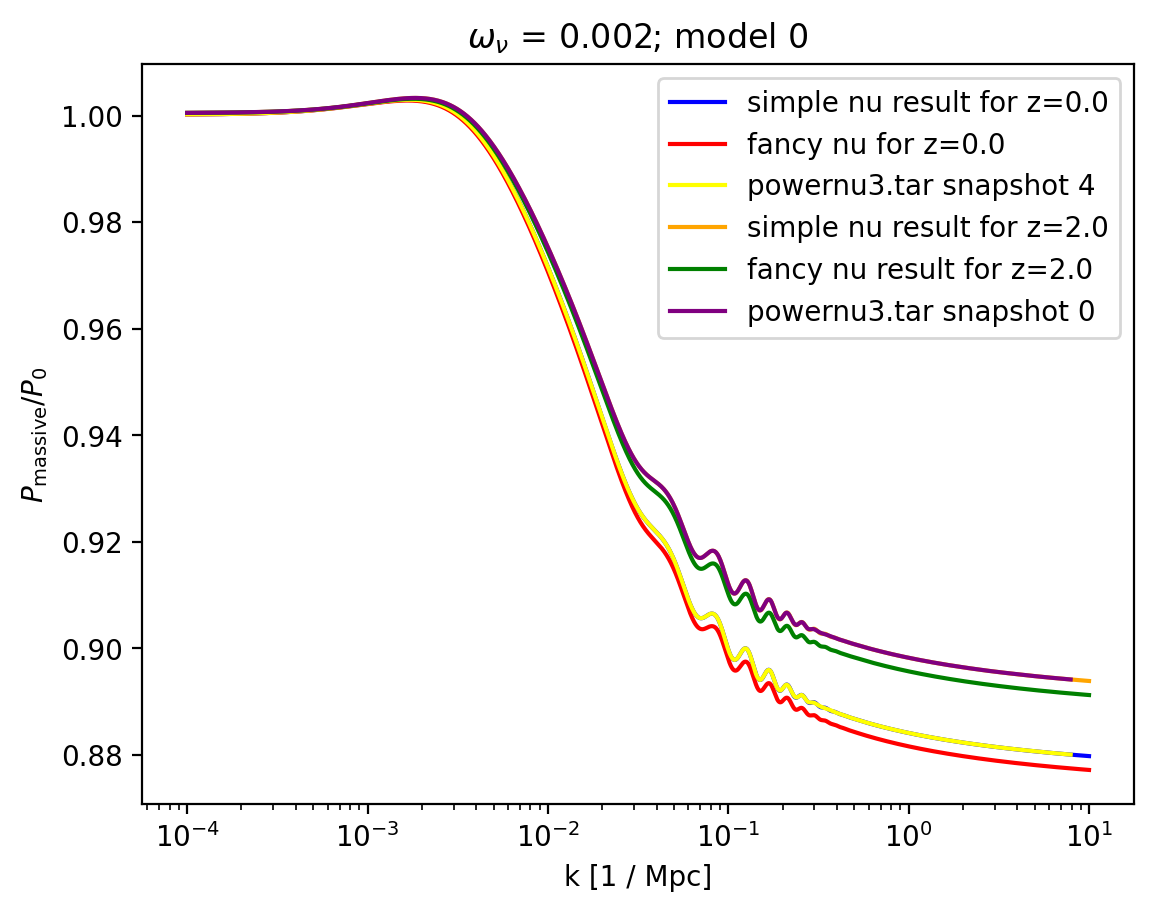

In [8]:
model_i = 0

true_early = powernu3[onh2_str][model_i][0]
true_late = powernu3[onh2_str][model_i][4]
# The following construction makes indexing a little easier later.
true_spec = [true_early, None, None, None, true_late]

h = spectra.cosm.loc[model_i]["h"]
snap_i = 4 # this should be SNAP index, not z index
z_list = spectra.parse_redshifts(model_i)

sim = spec_sims[onh2_str][model_i][snap_i]
nusim = sims_with_nu[onh2_str][model_i][snap_i]

# better_battery access
plt.plot(sim["k"], sim["P_nu"] / sim["P_no"],
    c='blue',
    label="simple nu result for z=" + str(z_list[snap_i]))
# nu battery access
plt.plot(nusim["k"], nusim["P_nu"] / nusim["P_no"],
    c='red',
    label="fancy nu for z=" + str(z_list[snap_i]))
# Ariel's results
plt.plot(true_spec[snap_i]["k"], true_spec[snap_i]["ratio"],
    c='yellow',
    label="powernu3.tar snapshot 4")

snap_i = 0 # This will correspond to z=0 for the model0 case.
sim = spec_sims[onh2_str][model_i][snap_i]
nusim = sims_with_nu[onh2_str][model_i][snap_i]

# better battery access
plt.plot(sim["k"], sim["P_nu"] / sim["P_no"],
    c='orange',
    label="simple nu result for z=" + str(z_list[snap_i]))
# nu battery access
plt.plot(nusim["k"], nusim["P_nu"] / nusim["P_no"],
    c='green',
    label="fancy nu result for z=" + str(z_list[snap_i]))
# Ariel's results
plt.plot(true_spec[snap_i]["k"], true_spec[snap_i]["ratio"],
    c='purple',
    label="powernu3.tar snapshot 0")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + onh2_str + "; model 0")
plt.legend()